# **LOGISTIC REGRESSION FROM SCRATCH**
This notebook demonstrates the implementation of a logistic regression model from scratch using Python and NumPy, applied to a dataset for predicting course completion. Logistic regression is a fundamental classification algorithm used to model binary outcomes based on input features. Here’s a detailed explanation of the code and the concepts involved:

Uptill now we have learned linear regression as a supervised learning model. Now we will move further and learn about classification model that is logistic regression.

Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict the probability of a binary outcome (e.g., yes/no, true/false). It is widely used in fields like medicine, finance, and social sciences for tasks such as predicting whether a patient has a certain disease based on diagnostic features or whether a customer will buy a product.

- Logistic Regression is a supervised classification model. That means that the algorithm is trained on labeled dataset. The data used to train the model includes both the input features and the corresponding correct output(labels)
- It has independent variables that are used to predict the dependent variable where the dependent variable is a category or is binary variable. For example,If we want to predict whether the email is spam or not, or ccurence of a disease based on several symptoms.

### **How is Logistic Regression different from Linear Regression**

**1. Output:**
- Logistic Regression: Predicts probabilities for binary outcomes, producing values between 0 and 1.

- Linear Regression: Predicts continuous values, with no inherent boundary or restriction on the output range.

**2. Function Used:**

- Logistic Regression: Uses the sigmoid function to map predicted values to probabilities.

- Linear Regression: Uses a linear function to directly predict the outcome.

**3. Purpose:**

- Logistic Regression: Suitable for classification tasks where the goal is to assign data points to one of two classes.

- Linear Regression: Suitable for regression tasks where the goal is to predict a continuous variable.

**4. Cost Function:**

- Logistic Regression: Uses binary cross-entropy as the cost function to evaluate prediction performance.

- Linear Regression: Uses mean squared error (MSE) to measure the difference between predicted and actual values.

### **Working:**
**1. Modeling Probability:**

Logistic regression models the probability of a binary outcome using the logistic function (or sigmoid function), which transforms the linear combination of input features into a value between 0 and 1.
The sigmoid function is defined as:

 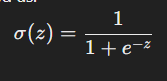

where 𝑧 = weights ⋅ features + bias

**2. Training the Model:**

- The model is trained using a dataset where the outcome is known. It estimates the parameters (weights and bias) that maximize the likelihood of the observed data.
- The cost function used is the binary cross-entropy loss, which measures the difference between predicted probabilities and the actual binary outcomes.

**3. Making Predictions:**

Once trained, logistic regression predicts the probability of the positive class. A threshold (typically 0.5) is used to convert this probability into a binary classification. But in case of Multi-class classification we can use sftmax activation function to give the outcome probabilities.

To implement logistic regression from scratch I am using OOP approach. Here is the complete breakdown of Logistic Regression class that contains all the methods for performing the logistic regression.

**1. Class Definition and Initialization**

- __init__ Method: Initializes the logistic regression model with:
- l_rate: Learning rate for gradient descent.
- epochs: Number of iterations for training.
- bias and weights: Parameters of the model, initially set to None.
- training_loss and testing_loss: Lists to store loss values during training for analysis.

**2. Sigmoid Function**

Computes the sigmoid function, which maps any real-valued number into the (0, 1) range. This is used to calculate the probability of the positive class.

**3. Fitting the model**
- **fit** Method: Trains the logistic regression model using gradient descent.
- Initializes weights and bias.
- Iterates through epochs:
    - Forward Pass:
    - Computes linear combination z_train and z_test for training and testing data.
    - Applies the sigmoid function to get predicted probabilities y_pred_train and y_pred_test.
    - Cost Calculation: Calculates the cost (or loss) using compute_cost method for both training and testing data.
    - Gradient Calculation: Computes gradients of weights and bias using calculate_gradient.
    - Parameter Update: Updates weights and bias using the gradients and learning rate.
    - Logging: Prints cost every 1000 epochs for monitoring.
    
**4. Making Predictions**

- Makes predictions on new data.
- Computes the linear combination z.
- Applies the sigmoid function to get probabilities.
- Converts probabilities to binary outcomes (0 or 1) based on a threshold of 0.5.

**5. Cost Calculation**

Computes the binary cross-entropy loss, which measures the difference between the predicted probabilities and the actual binary labels.

**6. Accuracy Calculation**

Calculates the accuracy of the predictions by comparing predicted labels with actual labels.

**7. Confusion Matrix**

Constructs a confusion matrix to evaluate the classification performance:
- True Positives (TP): Correctly predicted positive cases.
- True Negatives (TN): Correctly predicted negative cases.
- False Positives (FP): Incorrectly predicted positive cases.
- False Negatives (FN): Incorrectly predicted negative cases.

In [21]:
import numpy as np

class LogisticRegression:
    def __init__(self, l_rate = 0.01, epochs = 1000):
        self.epochs = epochs
        self.l_rate = l_rate
        self.bias = None
        self.weights = None
        self.training_loss = []
        self.testing_loss = []
    
    def sigmoid(self, x):
        return (1 / (1 + np.exp(-x)))
        
    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.epochs + 1):
            z_train = np.dot(X_train, self.weights) + self.bias
            y_pred_train = self.sigmoid(z_train)
            
            z_test = np.dot(X_test, self.weights) + self.bias
            y_pred_test = self.sigmoid(z_test)

            
            train_cost = self.compute_cost(y_train, y_pred_train)
            test_cost = self.compute_cost(y_test, y_pred_test)

            # Record the training and validation loss
            self.training_loss.append(train_cost)
            self.testing_loss.append(test_cost)
            
            dw, db = self.calculate_gradient(X_train, y_train, y_pred_train)
            if i%100==0:
                print(f'Epoch: {i}, Cost: {train_cost}')
                
            self.weights -= self.l_rate * dw
            self.bias -= self.l_rate * db
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        y_pred_binary = [0 if y < 0.5 else 1 for y in y_pred]
        return np.array(y_pred_binary)
    
   
    def compute_cost(self, y_true, y_pred):
        n = len(y_true)
        cost = (-1 / n) * np.sum((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)))
        return cost
    
    def calculate_gradient(self, X_train, y_true, y_pred):
        n = len(y_true)
        dw = (1 / n) * np.dot(X_train.T, (y_pred - y_true))
        db = (1 / n) * np.sum(y_pred - y_true)
        return dw, db
    
    
    def calculate_accuracy(self, y_pred, y_test):
        return np.sum(y_pred==y_test) / len(y_test)
            
    def confusion_matrix(self, y_true, y_pred):
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        return np.array([[tn, fp], [fn, tp]])

For training I am using a data of student course and based on variuos features we will try to predict whether the student has completed the course or not. Ihave dropped the User ID column becuase it is not needed and I have also done Encoding of the data to convert it into numerical form.

In [22]:
import pandas as pd
data = pd.read_csv('/kaggle/input/predict-online-course-engagement-dataset/online_course_engagement_data.csv')
data.drop(columns = 'UserID', inplace = True)

In [23]:
data.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,Science,35.038427,17,10,59.198853,95.433162,0,1
4,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
labelencoder_y= LabelEncoder()  
data['CourseCategory'] = labelencoder_y.fit_transform(data['CourseCategory'])
data.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0


I am splitting my data into train and test in the ratio of 0.2. We will use 80% of our data for training and the rest 20% for predictions and testing.

In [25]:
X = data.drop(columns = 'CourseCompletion')
y = data['CourseCompletion']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After asigning the feature columns and target column now is the time for standardizing our data. For that I am using Standard Sclaer from sklearn.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.40848799, -0.90479096, -1.33080907, ...,  1.27943273,
         1.04406134,  0.99252792],
       [ 0.69747954,  0.64323047, -0.33619034, ..., -0.69927748,
         0.99404611,  0.99252792],
       [ 0.69747954, -1.00254686,  1.65304711, ..., -0.29786394,
         0.59025843,  0.99252792],
       ...,
       [-0.72453736, -0.65495173, -0.8334997 , ..., -0.21005334,
        -1.50337299,  0.99252792],
       [-0.72453736,  1.45940762, -1.33080907, ...,  1.42303397,
         0.71108253, -1.00752834],
       [ 0.69747954, -1.07665507,  1.32150754, ...,  0.44113859,
         0.40097621, -1.00752834]])

Now we will create an instance of our Logistic Regression class. I am using a learning rate of 0.1 and 100 epochs. After creating the instance I have called the fit method to train our model

In [27]:
model = LogisticRegression(0.1, 1000)
model.fit(X_train, y_train, X_test, y_test)

Epoch: 0, Cost: 0.6931471805599452
Epoch: 100, Cost: 0.457568282752076
Epoch: 200, Cost: 0.44011615365576745
Epoch: 300, Cost: 0.4364254687662448
Epoch: 400, Cost: 0.43540137397894474
Epoch: 500, Cost: 0.4350825308510586
Epoch: 600, Cost: 0.4349773522538431
Epoch: 700, Cost: 0.4349415502065742
Epoch: 800, Cost: 0.43492914537327454
Epoch: 900, Cost: 0.43492480301959086
Epoch: 1000, Cost: 0.4349232738178978


From he above reults we can see that our cost has gradually decreased over the epochs. Now if we want to see how our model has performed for Training and testing data we can create a plot of Loss vs epochs.

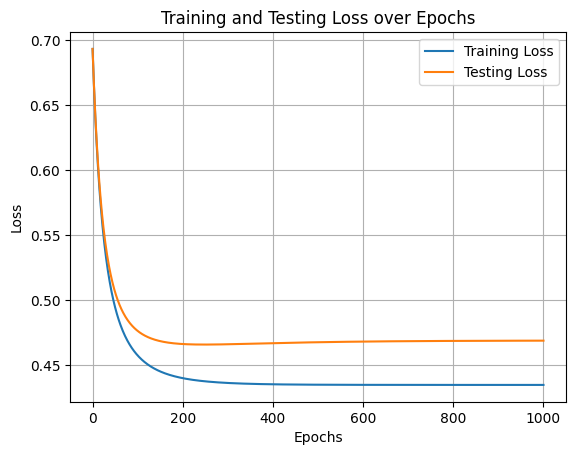

In [13]:
import matplotlib.pyplot as plt
# Plotting training and validation loss over epochs
plt.plot(model.training_loss, label='Training Loss')
plt.plot(model.testing_loss, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Now we will call the accuravy function to check the accuracy of our model. 

In [14]:
y_pred = model.predict(X_test)
acc = model.calculate_accuracy(y_pred, y_test)
acc

0.7883333333333333

If we print the confusion matrix we will get:

In [15]:
# Compute the confusion matrix
cm = model.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[909 159]
 [222 510]]


**Interpretation**

**1 True Positives (TP):** 510

The number of times the model correctly predicted the positive class (CourseCompletion = 1).

**2. True Negatives (TN):** 909

The number of times the model correctly predicted the negative class (CourseCompletion = 0).

**3.False Positives (FP):** 159

The number of times the model incorrectly predicted the positive class when it was actually negative. This indicates instances where the model predicted a course was completed, but it was not.

**4. False Negatives (FN):** 222

The number of times the model incorrectly predicted the negative class when it was actually positive. This indicates instances where the model predicted a course was not completed, but it was.

#### **Basic Intuition for Multinomial Logistic Regression**

To extend logistic regression to handle multiple classes (multinomial classification), you need to adjust your approach from binary to multi-class classification. Here’s how you can modify the code to handle multiple classes:

**1. Softmax Function:** Instead of using the sigmoid function, you use the softmax function. This function generalizes logistic regression to multiple classes and computes the probability of each class.

**2. One-vs-Rest (OvR):** For each class, a binary classifier is trained to distinguish that class from all other classes. During prediction, the class with the highest probability is selected.

**3. Cross-Entropy Loss:** Replace the binary cross-entropy loss with categorical cross-entropy loss, which is used for multi-class classification.

---
In this notebook, we implemented logistic regression from scratch to solve binary classification problems. We covered the fundamental concepts behind logistic regression, including the sigmoid function, cost computation, gradient descent, and performance metrics like accuracy and confusion matrix. The implementation demonstrated how logistic regression predicts probabilities and makes decisions based on a threshold.

Additionally, we explored how to extend logistic regression to handle multi-class classification using multinomial logistic regression. This involves using the softmax function, cross-entropy loss, and one-vs-rest strategies to classify data into multiple categories.

This hands-on approach helps in understanding the underlying mechanics of logistic regression and provides insights into how changes in model architecture and loss functions can be implemented to cater to various types of classification problems.